# Import Packages

In [116]:
import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [117]:
df = pd.read_csv("loan_home.csv")

In [118]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [119]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Data Understanding

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [121]:
df = df.rename(columns = {'ApplicantIncome' : 'Applicant_Income', 'CoapplicantIncome' : 'Co_Applicant_Income',
                           'LoanAmount' : 'Loan_Amount', 'Property_Area' : 'Residential_Area'})

In [122]:
df['Income_Gabungan'] = df['Applicant_Income'] + df['Co_Applicant_Income']

In [123]:
df = df[[
    "Loan_ID",
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Applicant_Income",
    "Co_Applicant_Income",
    "Income_Gabungan",
    "Loan_Amount",
    "Loan_Amount_Term",
    "Credit_History",
    "Residential_Area",
    "Loan_Status"]]

In [124]:
Cats = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed',
        'Residential_Area','Loan_Status']

In [125]:
df[Cats].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Residential_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [126]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

1. Count = Loan ID maka tidak perlu dilakukan perubahan apa-apa
2. Gender mayoritas dalam dataset ini adalah Male
3. Sekitar 64% dari total Calon Client sudah menikah (Married)
4. Sekitar 50% lebih calon Client tidak memiliki Dependents
5. Hampir 80% dari semua calon Client seorang lulusan Sarjana
6. 80% dari calon Client bukan merupakan Self_Employed
7. Area Terfavorit yang dipilih oleh Calon Client adalah Semiurban


In [127]:
df['Loan_Status'] = df['Loan_Status'].replace('N', 'Rejected').replace('Y', 'Accepted')

# replace some minor change

## Dependents and Loan Status Approval Comparison

In [128]:
Nol = df[(df['Dependents'] == '0') & (df['Loan_Status'] == 'Accepted')]

In [129]:
Satu = df[(df['Dependents'] == '1') & (df['Loan_Status'] == 'Accepted')]

In [130]:
Dua = df[(df['Dependents'] == '2') & (df['Loan_Status'] == 'Accepted')]

In [131]:
Tiga = df[(df['Dependents'] == '3+') & (df['Loan_Status'] == 'Accepted')]

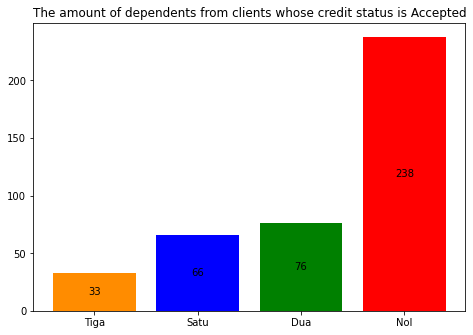

In [132]:
Nol_size = Nol['Loan_Status'].count()
Satu_size = Satu['Loan_Status'].count()
Dua_size = Dua['Loan_Status'].count()
Tiga_size = Tiga['Loan_Status'].count()

areas = ['Nol','Satu','Dua','Tiga']
counts = [Nol_size, Satu_size, Dua_size, Tiga_size]

# sort the areas and counts in ascending order
areas_counts = list(zip(areas, counts))
areas_counts.sort(key=lambda x: x[1])
areas, counts = zip(*areas_counts)

# plot the sizes of the dataframes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colors = ['darkorange', 'blue', 'green', 'red']
ax.bar(areas, counts, color = colors)

# add count label in the middle of each bars
for i in range(len(areas)):
  ax.text(i, counts[i]/2, counts[i], ha = 'center', va = 'center')
plt.title ("The amount of dependents from clients whose credit status is Accepted")
plt.show()

## Residential Area and Loan Status Approval Comparison


In [133]:
Rural = df[(df['Residential_Area'] =='Rural') & (df['Loan_Status'] == 'Accepted')]

In [134]:
# Filter the DataFrame to only include rows with "Residential_Area" = "Rural" and "Loan_Status" = "Accepted"
Rural = df[(df['Residential_Area'] =='Rural') & (df['Loan_Status'] == 'Accepted')]

# Sort the filtered DataFrame based on "Applicant_Income" in ascending order
Rural.sort_values("Applicant_Income", inplace=True, ascending=True)

# Show the sorted DataFrame
print(Rural)

      Loan_ID  Gender Married Dependents Education Self_Employed  \
500  LP002603  Female      No          0  Graduate            No   
188  LP001644     NaN     Yes          0  Graduate           Yes   
418  LP002345    Male     Yes          0  Graduate            No   
530  LP002717    Male     Yes          0  Graduate            No   
578  LP002877    Male     Yes          1  Graduate            No   
..        ...     ...     ...        ...       ...           ...   
115  LP001401    Male     Yes          1  Graduate            No   
324  LP002065    Male     Yes         3+  Graduate            No   
475  LP002527    Male     Yes          2  Graduate           Yes   
525  LP002699    Male     Yes          2  Graduate           Yes   
126  LP001448     NaN     Yes         3+  Graduate            No   

     Applicant_Income  Co_Applicant_Income  Income_Gabungan  Loan_Amount  \
500               645               3683.0           4328.0        113.0   
188               674          

C:\Users\RZHD ID\AppData\Local\Temp\ipykernel_7568\168862248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rural.sort_values("Applicant_Income", inplace=True, ascending=True)


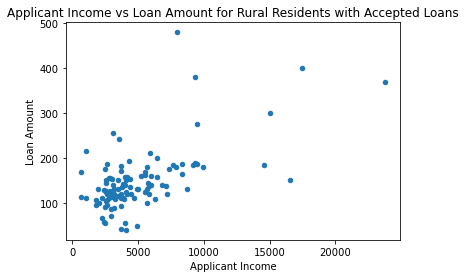

In [135]:
# Plot the "Applicant_Income" column in the sorted DataFrame
Rural.plot(x='Applicant_Income', y='Loan_Amount', kind='scatter')

# Add labels and title to the plot
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount for Rural Residents with Accepted Loans')

# Show the plot
plt.show()

### Top 5% Minimum Income that Eligible for Home Loan on Rural Area

In [ ]:
oke = Rural.nsmallest(int(len(df)*0.05), "Income_Gabungan")

In [ ]:
oke.sort_values("Income_Gabungan").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
407,LP002314,Female,No,0,Not Graduate,No,2213,0.000000,2213.000000,66.0,360.0,1.0,Rural,Accepted
312,LP002006,Female,No,0,Graduate,No,2507,0.000000,2507.000000,56.0,360.0,1.0,Rural,Accepted
609,LP002978,Female,No,0,Graduate,No,2900,0.000000,2900.000000,71.0,360.0,1.0,Rural,Accepted
428,LP002369,Male,Yes,0,Graduate,No,2920,16.120001,2936.120001,87.0,360.0,1.0,Rural,Accepted
255,LP001846,Female,No,3+,Graduate,No,3083,0.000000,3083.000000,255.0,360.0,1.0,Rural,Accepted


Text(0.5, 1.0, 'Top 5% Minimum Income that Eligible for Home Loan on Rural Area')

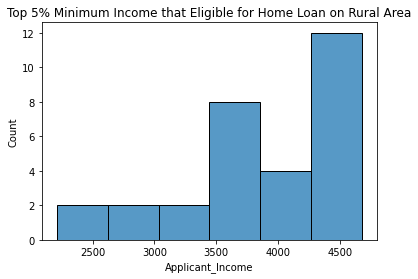

In [ ]:
result = sns.histplot(oke['Income_Gabungan'])

plt.xlabel("Applicant_Income")
plt.title("Top 5% Minimum Income that Eligible for Home Loan on Rural Area")

In [ ]:
Urban = df[(df['Residential_Area'] =='Urban') & (df['Loan_Status'] == 'Accepted')]

In [ ]:
# Filter the DataFrame to only include rows with "Residential_Area" = "Urban" and "Loan_Status" = "Accepted"
Urban = df[(df['Residential_Area'] =='Urban') & (df['Loan_Status'] == 'Accepted')]

# Sort the filtered DataFrame based on "Applicant_Income" in ascending order
Urban.sort_values("Applicant_Income", inplace=True, ascending=True)

# Show the sorted DataFrame
print(Urban)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
14   LP001030    Male     Yes          2      Graduate            No   
147  LP001518    Male     Yes          1      Graduate            No   
303  LP001977    Male     Yes          1      Graduate            No   
41   LP001120    Male      No          0      Graduate            No   
249  LP001825    Male     Yes          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
534  LP002731  Female      No          0  Not Graduate           Yes   
130  LP001469    Male      No          0      Graduate           Yes   
506  LP002624    Male     Yes          0      Graduate            No   
171  LP001585     NaN     Yes         3+      Graduate            No   
333  LP002101    Male     Yes          0      Graduate           NaN   

     Applicant_Income  Co_Applicant_Income  Income_Gabungan  Loan_Amount  \
14               1299               1086.0           2385.0

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


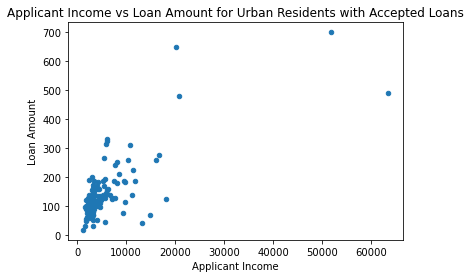

In [136]:
# Plot the "Applicant_Income" column in the sorted DataFrame
Urban.plot(x='Applicant_Income', y='Loan_Amount', kind='scatter')

# Add labels and title to the plot
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount for Urban Residents with Accepted Loans')

# Show the plot
plt.show()

### Top 5% Minimum Income that Eligible for Home Loan on Urban Area

In [141]:
yay = Urban.nsmallest(int(len(df)*0.05), "Income_Gabungan")

KeyError: 'Income_Gabungan'

In [ ]:
yay.sort_values("Income_Gabungan").head()

In [ ]:
sns.histplot(yay['Income_Gabungan'])

plt.xlabel("Applicant_Income")
plt.title("Top 5% Minimum Income that Eligible for Home Loan on Urban Area")

In [142]:
Semi_Urban = df[(df['Residential_Area'] =='Semiurban') & (df['Loan_Status'] == 'Accepted')]

In [143]:
# Filter the DataFrame to only include rows with "Residential_Area" = "Semiurban" and "Loan_Status" = "Accepted"
Semiurban = df[(df['Residential_Area'] =='Semiurban') & (df['Loan_Status'] == 'Accepted')]

# Sort the filtered DataFrame based on "Applicant_Income" in ascending order
Semiurban.sort_values("Applicant_Income", inplace=True, ascending=True)

# Show the sorted DataFrame
print(Semiurban)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
468  LP002502  Female     Yes          2  Not Graduate           NaN   
99   LP001343    Male     Yes          0      Graduate            No   
160  LP001560    Male     Yes          0  Not Graduate            No   
71   LP001245    Male     Yes          2  Not Graduate           Yes   
436  LP002398    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
493  LP002582  Female      No          0  Not Graduate           Yes   
561  LP002813  Female     Yes          1      Graduate           Yes   
443  LP002422    Male      No          1      Graduate            No   
185  LP001640    Male     Yes          0      Graduate           Yes   
155  LP001536    Male     Yes         3+      Graduate            No   

     Applicant_Income  Co_Applicant_Income  Income_Gabungan  Loan_Amount  \
468               210               2917.0           3127.0

C:\Users\RZHD ID\AppData\Local\Temp\ipykernel_7568\2314135907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Semiurban.sort_values("Applicant_Income", inplace=True, ascending=True)


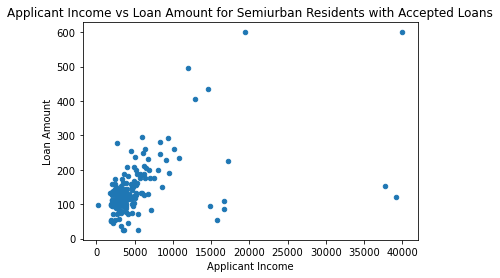

In [144]:
# Plot the "Applicant_Income" column in the sorted DataFrame
Semiurban.plot(x='Applicant_Income', y='Loan_Amount', kind='scatter')

# Add labels and title to the plot
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount for Semiurban Residents with Accepted Loans')

# Show the plot
plt.show()

### Top 5% Minimum Income that Eligible for Semiurban Area

In [ ]:
yuhu = Semi_Urban.nsmallest(int(len(df)*0.05), "Income_Gabungan")

In [ ]:
yuhu.sort_values("Income_Gabungan").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,1963.0,53.0,360.0,1.0,Semiurban,Accepted
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,2165.0,70.0,360.0,1.0,Semiurban,Accepted
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,2395.0,NaN,360.0,1.0,Semiurban,Accepted
521,LP002690,Male,No,0,Graduate,No,2500,0.0,2500.0,55.0,360.0,1.0,Semiurban,Accepted
132,LP001478,Male,No,0,Graduate,No,2718,0.0,2718.0,70.0,360.0,1.0,Semiurban,Accepted


Text(0.5, 1.0, 'Top 5% Minimum Income that Eligible for Home Loan on Semiurban Area')

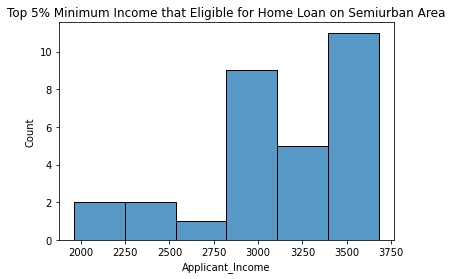

In [ ]:
sns.histplot(yuhu['Income_Gabungan'])
plt.xlabel("Applicant_Income")
plt.title("Top 5% Minimum Income that Eligible for Home Loan on Semiurban Area")

## Minimum Income that Eligible for Home Loan

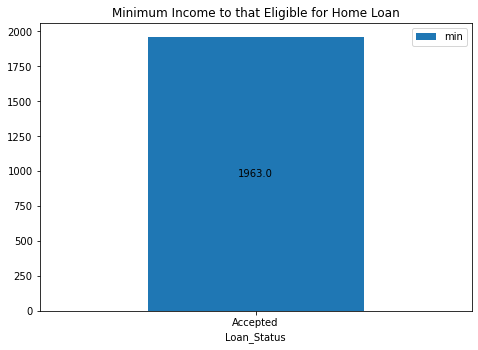

In [ ]:
grouped = result.groupby('Loan_Status')

minimal = grouped['Income_Gabungan'].agg(['min'])

# Filter for the "Accepted" group
minimal = minimal.loc[minimal.index == 'Accepted']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
minimal.plot(kind ='bar', ax=ax)

# add the value of each bar in the middle
for i in range(len(minimal)):
    ax.text(i, minimal.iloc[i]['min']/2, minimal.iloc[i]['min'], ha ='center', va='center')

plt.title("Minimum Income to that Eligible for Home Loan")
plt.xticks(rotation=0)  
plt.show()

# Top 5% Minimum Income that Eligible for Home Loan

In [ ]:
frames = [yay,oke,yuhu]

In [ ]:
result = pd.concat(frames)

Text(0.05, 0.95, 'Below mean: 43\nAbove mean: 47')

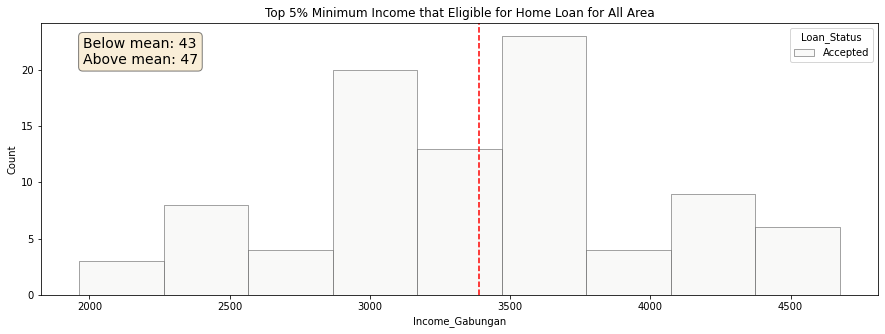

In [ ]:
mean = result['Income_Gabungan'].mean()
below_mean = result[result['Income_Gabungan'] < mean].shape[0]
above_mean = result[result['Income_Gabungan'] >= mean].shape[0]

f, ax = plt.subplots(1, figsize = (15,5))
sns.histplot(result, x = 'Income_Gabungan', hue = 'Loan_Status', multiple = 'stack', palette = 'PiYG', edgecolor = '.3', linewidth = .5, ax = ax)
ax.axvline(mean, color='red', linestyle='--')
plt.title("Top 5% Minimum Income that Eligible for Home Loan for All Area")

textstr = '\n'.join((
    r'Below mean: %d' % (below_mean, ),
    r'Above mean: %d' % (above_mean, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Text(3388.6435554293334, 23, '3388.6435554293334')

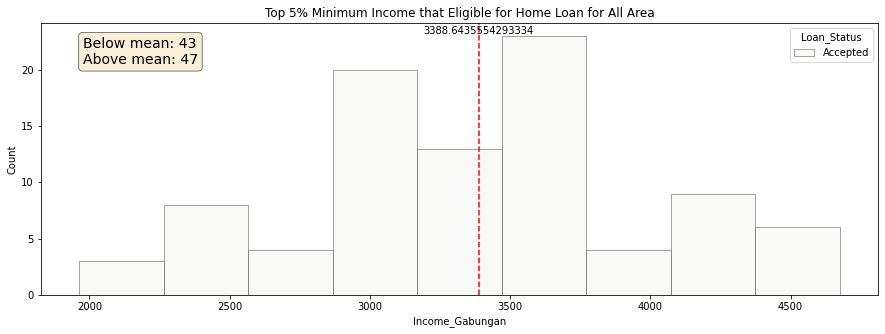

In [ ]:
mean = result['Income_Gabungan'].mean()
below_mean = result[result['Income_Gabungan'] < mean].shape[0]
above_mean = result[result['Income_Gabungan'] >= mean].shape[0]

f, ax = plt.subplots(1, figsize = (15,5))
sns.histplot(result, x = 'Income_Gabungan', hue = 'Loan_Status', multiple = 'stack', palette = 'PiYG', edgecolor = '.3', linewidth = .5, ax = ax)
ax.axvline(mean, color='red', linestyle='--')
plt.title("Top 5% Minimum Income that Eligible for Home Loan for All Area")

textstr = '\n'.join((
    r'Below mean: %d' % (below_mean, ),
    r'Above mean: %d' % (above_mean, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05,0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.text(mean, 23, str(mean), ha='center', va='bottom')

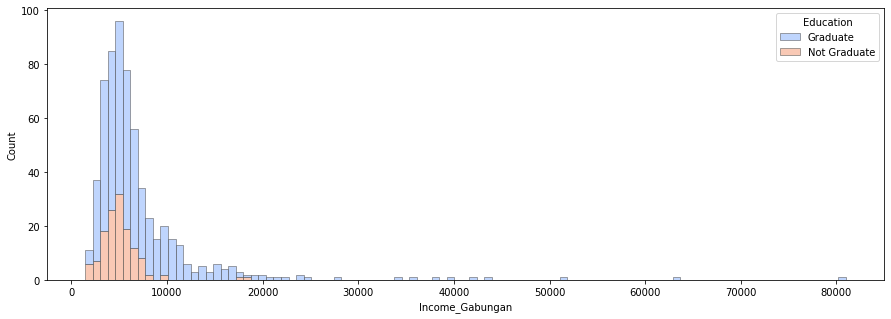

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(df, x = 'Income_Gabungan', hue = 'Education', multiple = 'stack', palette = 'coolwarm', edgecolor = '.3',
            linewidth = .5, ax = ax);

## What Credit History Status for Top 5% Lowest Income for All Area?

In [ ]:
zero = result.nsmallest(30, "Income_Gabungan")

Text(0.5, 1.0, 'Credit History Status for 5% Lowest Income that Eligible for Home Loan')

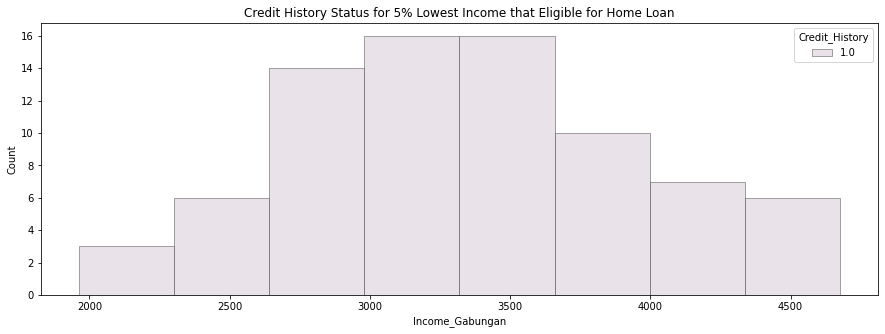

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(result, x = 'Income_Gabungan', hue = 'Credit_History', multiple = 'stack', palette = 'twilight', edgecolor = '.3',
            linewidth = .5, ax = ax);
plt.title("Credit History Status for 5% Lowest Income that Eligible for Home Loan")

# Does Gender affect the Approval of Home Loan? 

In [ ]:
cross_tab_prop = pd.crosstab(index=df['Gender']
                             ,columns=df['Loan_Status'],
                             normalize='index')

In [ ]:
cross_tab_prop

Loan_Status,Accepted,Rejected
Gender,,
Female,0.669643,0.330357
Male,0.693252,0.306748


In [ ]:
cross_tab = pd.crosstab(index=df['Gender'],
                       columns=df['Loan_Status'])

In [ ]:
cross_tab

Loan_Status,Accepted,Rejected
Gender,,
Female,75,37
Male,339,150


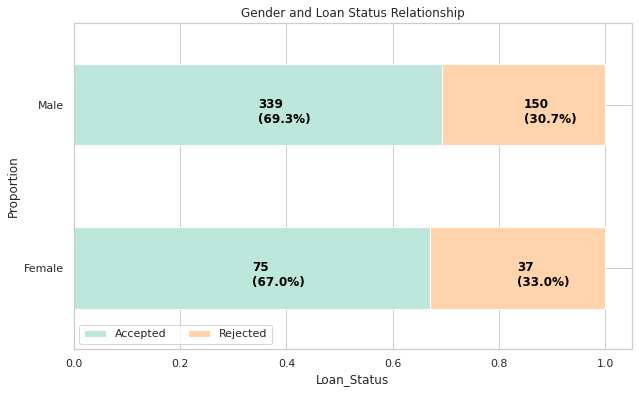

In [ ]:
cross_tab_prop.plot(kind='barh',
                   stacked='True',
                   colormap='icefire',
                   figsize=(10,6))

plt.legend(loc='lower left', ncol = 2)
plt.xlabel("Loan_Status")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
plt.title("Gender and Loan Status Relationship")
plt.show()

# Does Marital Status Affect the Approval of Home Loan?

In [ ]:
cross_tab_prop = pd.crosstab(index=df['Married']
                             ,columns=df['Loan_Status'],
                             normalize='index')

In [ ]:
cross_tab = pd.crosstab(index=df['Married'],
                       columns=df['Loan_Status'])

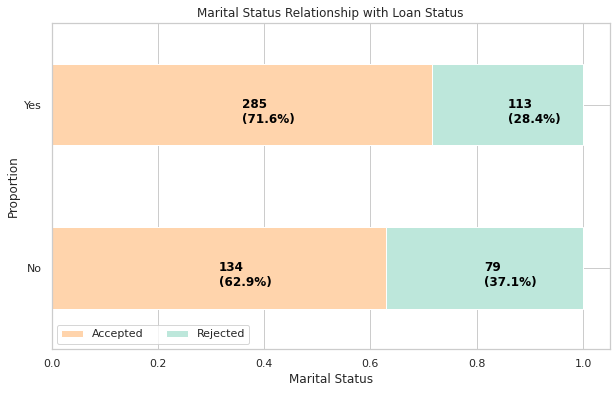

In [ ]:
cross_tab_prop.plot(kind='barh',
                   stacked='True',
                   colormap='icefire_r',
                   figsize=(10,6))

plt.legend(loc='lower left', ncol = 2)
plt.xlabel("Marital Status")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title("Marital Status Relationship with Loan Status")
plt.show()

# Does Education Grade Affect the Approval of Home Loan?

In [ ]:
cross_tab_prop = pd.crosstab(index=df['Education']
                             ,columns=df['Loan_Status'],
                             normalize='index')

In [ ]:
cross_tab = pd.crosstab(index=df['Education'],
                       columns=df['Loan_Status'])

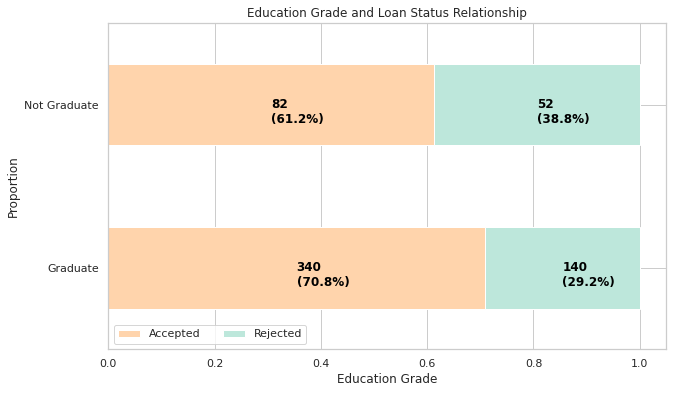

In [ ]:
cross_tab_prop.plot(kind='barh',
                   stacked='True',
                   colormap='icefire_r',
                   figsize=(10,6))

plt.legend(loc='lower left', ncol = 2)
plt.xlabel("Education Grade")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
plt.title("Education Grade and Loan Status Relationship")
plt.show()

# Compare Credit History with Categorical Data

## Credit History vs Gender

Text(0.5, 1.0, 'Credit History vs Gender')

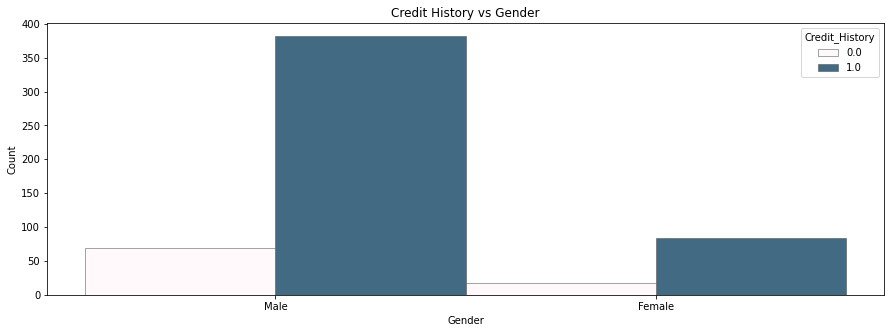

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(df, x = 'Gender', hue = 'Credit_History', multiple = 'dodge', palette = 'PuBu', edgecolor = '.3',
            linewidth = .5, ax = ax);
plt.title("Credit History vs Gender")

## Credit History vs Marital Status

Text(0.5, 1.0, 'Credit History vs Marital Status')

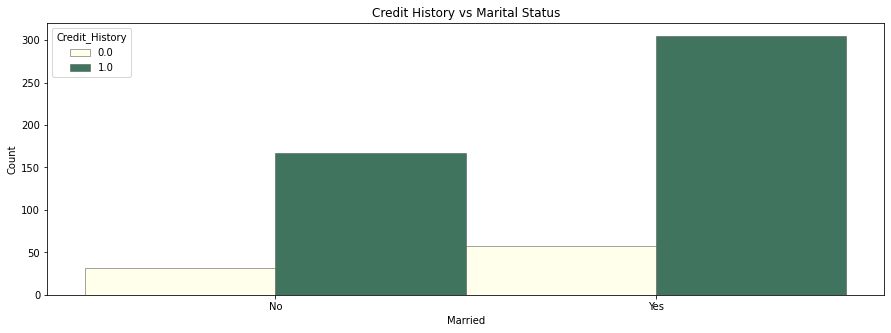

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(df, x = 'Married', hue = 'Credit_History', multiple = 'dodge', palette = 'YlGn', edgecolor = '.3',
            linewidth = .5, ax = ax);
plt.title("Credit History vs Marital Status")

## Credit History vs Dependents

Text(0.5, 1.0, 'Credit History vs Dependents')

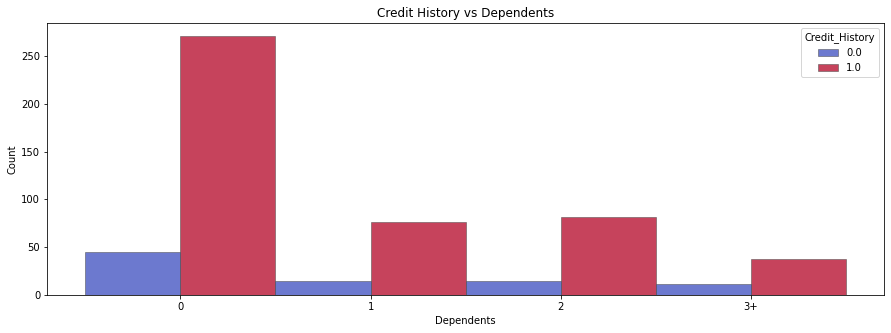

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(df, x = 'Dependents', hue = 'Credit_History', multiple = 'dodge', palette = 'coolwarm', edgecolor = '.3',
            linewidth = .5, ax = ax);
plt.title("Credit History vs Dependents")

## Credit History vs Education

Text(0.5, 1.0, 'Credit History vs Education')

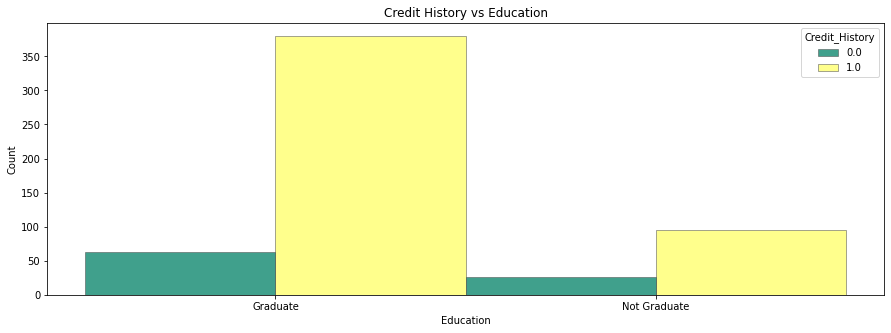

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(df, x = 'Education', hue = 'Credit_History', multiple = 'dodge', palette = 'summer', edgecolor = '.3',
            linewidth = .5, ax = ax);

plt.title("Credit History vs Education")

## Credit History vs Job Type

Text(0.5, 1.0, 'Credit History vs Self Employed')

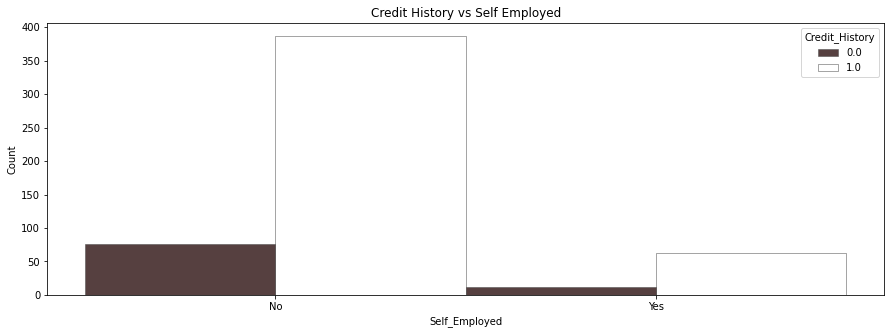

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(df, x = 'Self_Employed', hue = 'Credit_History', multiple = 'dodge', palette = 'pink', edgecolor = '.3',
            linewidth = .5, ax = ax);

plt.title("Credit History vs Self Employed")

# Compare Marital Status with Numerical Data

Text(0.5, 1.0, 'Marital Status vs Loan_Status')

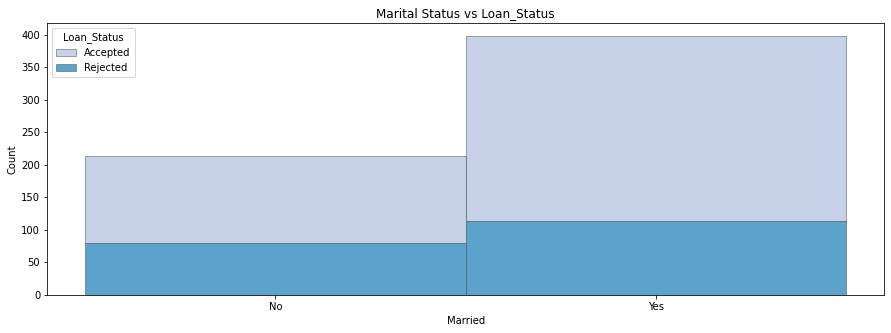

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(df, x = 'Married', hue = 'Loan_Status', multiple = 'stack', palette = 'PuBu', edgecolor = '.3',
            linewidth = .5, ax = ax);
plt.title("Marital Status vs Loan_Status")

Text(0.5, 1.0, 'Marital Status vs Loan Amount')

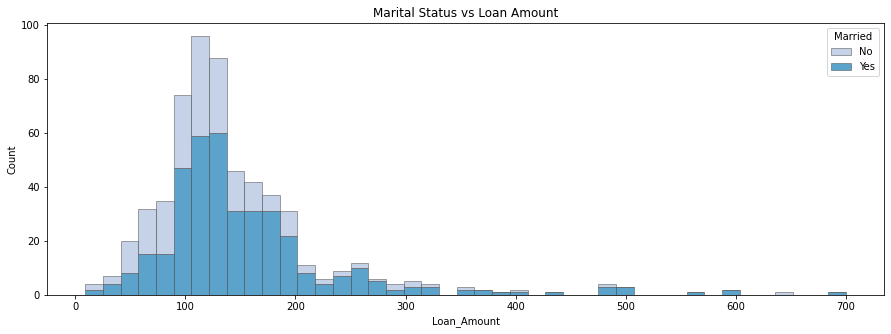

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))

sns.histplot(df, x = 'Loan_Amount', hue = 'Married', multiple = 'stack', palette = 'PuBu', edgecolor = '.3',
            linewidth = .5, ax = ax);
plt.title("Marital Status vs Loan Amount")

# Compare Loan Amount with Categorical Data

## Loan Amount vs Gender

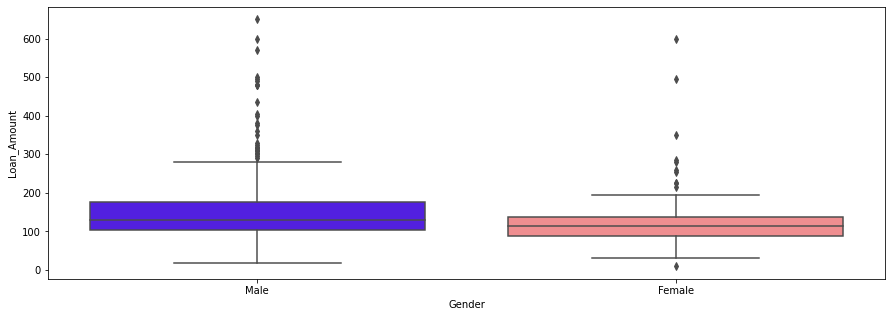

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))
sns.boxplot(x= 'Gender', y = 'Loan_Amount', palette = 'gnuplot2', data = df, ax=ax)

##Loan Amount vs Dependents

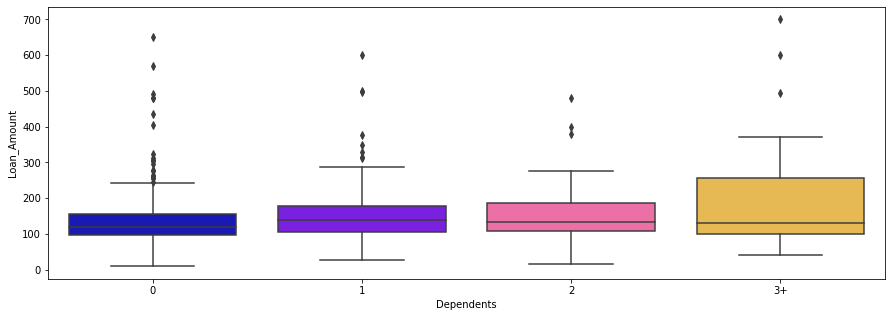

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))
sns.boxplot(x = 'Dependents', y = 'Loan_Amount', palette = 'gnuplot2', data = df, ax=ax)

## Loan Amount vs Education Grade

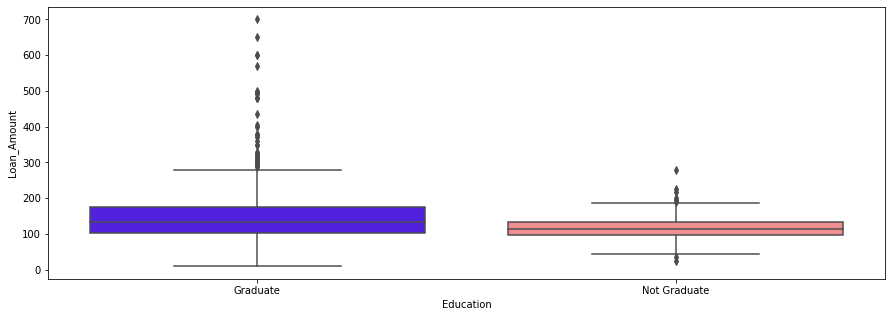

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))
sns.boxplot(x= 'Education', y = 'Loan_Amount', palette = 'gnuplot2', data = df, ax=ax)

## Loan Amount vs Residential Area

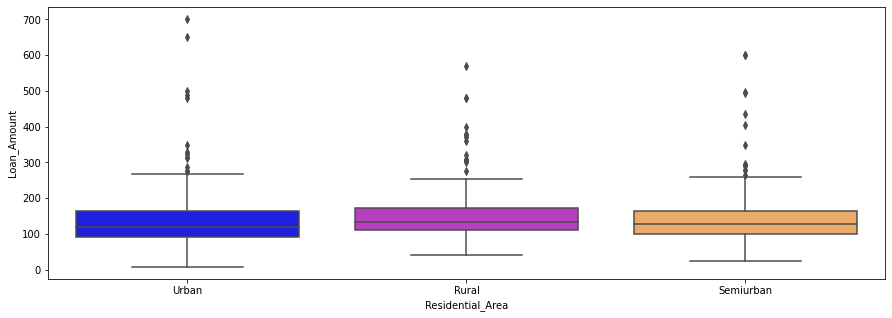

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))
sns.boxplot(x= 'Residential_Area', y = 'Loan_Amount', palette = 'gnuplot2', data = df, ax=ax)

## Loan Amount vs Loan Status

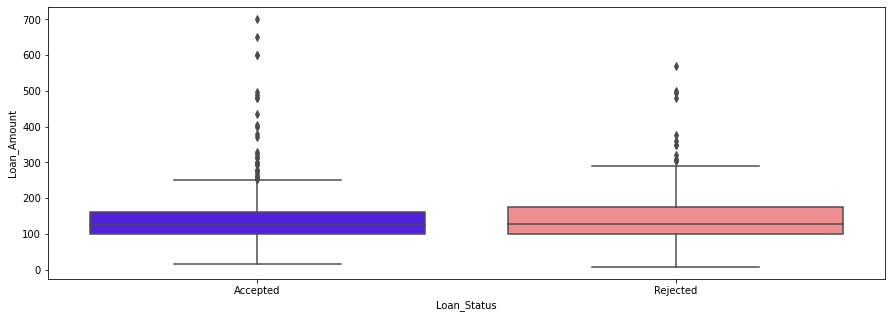

In [ ]:
f, ax = plt.subplots(1, figsize = (15,5))
sns.boxplot(x= 'Loan_Status', y = 'Loan_Amount', palette = 'gnuplot2', data = df, ax=ax)

## Number of each Residential Area that Accepted in Home Loan

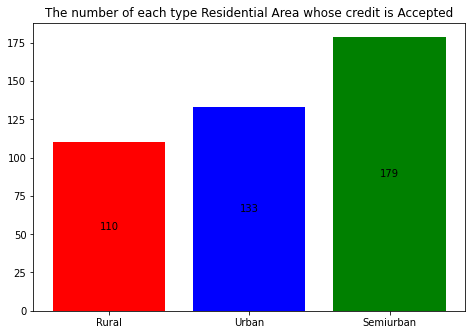

In [ ]:
Rural_size = Rural['Loan_Status'].count()
Urban_size = Urban['Loan_Status'].count()
Semi_Urban_size = Semi_Urban['Loan_Status'].count()

# Plot the sizes of the dataframes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
areas = ['Rural', 'Urban', 'Semiurban']
counts = [Rural_size, Urban_size, Semi_Urban_size]
colors = ['red', 'blue', 'green']
ax.bar(areas,counts,color=colors)

# Add count labels in the middle of each bar
for i in range(len(areas)):
    ax.text(i, counts[i]/2, counts[i], ha='center', va='center')

plt.title ("The number of each type Residential Area whose credit is Accepted")
plt.show()

## Credit History and Applicant Income with Loan Status

In [ ]:
# Apakah ada client dengan Credit History 0 tapi di Approve Loan?
appr = df[(df['Credit_History'] == 0 ) & (df['Loan_Status'] == 'Accepted')]
appr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,11117.0,137.0,360.0,0.0,Semiurban,Accepted
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,39999.0,600.0,180.0,0.0,Semiurban,Accepted
201,LP001677,Male,No,2,Graduate,No,4923,0.0,4923.0,166.0,360.0,0.0,Semiurban,Accepted
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,6144.0,160.0,360.0,0.0,Urban,Accepted
326,LP002068,Male,No,0,Graduate,No,4917,0.0,4917.0,130.0,360.0,0.0,Rural,Accepted
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,4949.0,90.0,180.0,0.0,Rural,Accepted
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,6715.0,161.0,360.0,0.0,Semiurban,Accepted


In [ ]:
appr.sort_values('Income_Gabungan')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
326,LP002068,Male,No,0,Graduate,No,4917,0.0,4917.0,130.0,360.0,0.0,Rural,Accepted
201,LP001677,Male,No,2,Graduate,No,4923,0.0,4923.0,166.0,360.0,0.0,Semiurban,Accepted
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,4949.0,90.0,180.0,0.0,Rural,Accepted
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,6144.0,160.0,360.0,0.0,Urban,Accepted
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,6715.0,161.0,360.0,0.0,Semiurban,Accepted
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,11117.0,137.0,360.0,0.0,Semiurban,Accepted
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,39999.0,600.0,180.0,0.0,Semiurban,Accepted


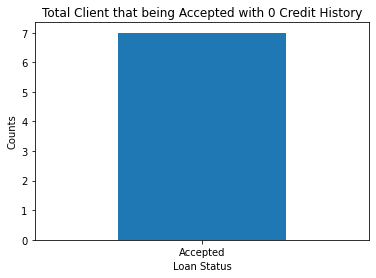

In [ ]:
import matplotlib.pyplot as plt

appr = df[(df['Credit_History'] == 0 ) & (df['Loan_Status'] == 'Accepted')]
appr['Loan_Status'].value_counts().plot(kind='bar')

plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.title('Total Client that being Accepted with 0 Credit History')
plt.show()

In [ ]:
df['Loan_Status'] = df['Loan_Status'].replace('N', 'Rejected').replace('Y', 'Accepted')

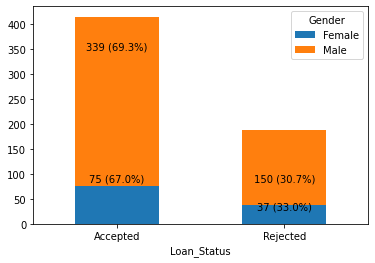

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by Loan_Status and Gender
grouped = df.groupby(['Loan_Status', 'Gender']).size().unstack()

# Plot the grouped data as a stacked bar chart
fig, ax = plt.subplots()
grouped.plot(kind='bar', stacked=True, ax=ax)

# Calculate the total for each gender
totals = grouped.sum(axis=0)

# Add the count and percentage values in the middle of each bar
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    y = height if i % 2 == 0 else height - (height / 2)
    ax.annotate('{} ({:.1f}%)'.format(int(height), (height/totals[i//2]*100)),
                xy=(rect.get_x() + rect.get_width() / 2, y),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

## Re-Analyze using Pie-Chart

In [ ]:
# Berapa minimal income dari 

([<matplotlib.patches.Wedge at 0x7f10cc037df0>,
 [Text(-0.378913619011373, 1.032678299049469, 'Accepted'),
  Text(0.3789137156976911, -1.0326782635730112, 'Rejected')],
 [Text(-0.20668015582438523, 0.5632790722088011, '61.19%'),
  Text(0.20668020856237695, -0.563279052858006, '38.81%')])

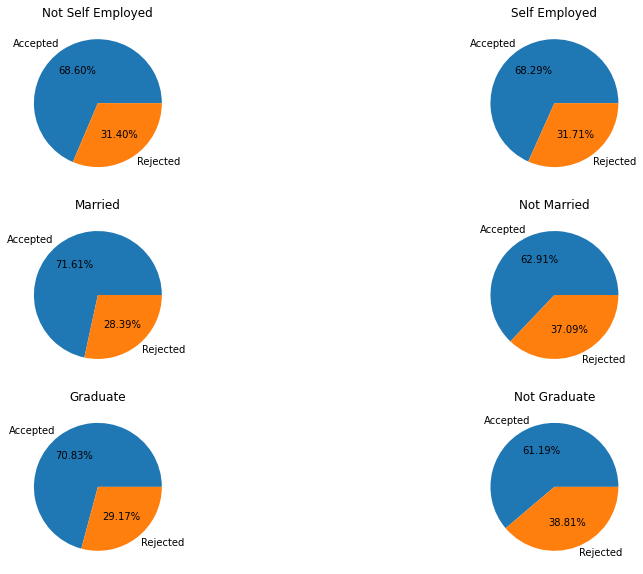

In [ ]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

ax1.set_title("Not Self Employed")
ax2.set_title("Self Employed")
ax3.set_title("Married")
ax4.set_title("Not Married")
ax5.set_title("Graduate")
ax6.set_title("Not Graduate")

ax1.pie(df[df['Self_Employed']=='No'].groupby('Loan_Status')['Loan_ID'].count(),autopct='%.2f%%',labels=['Accepted','Rejected'])
ax2.pie(df[df['Self_Employed']=='Yes'].groupby('Loan_Status')['Loan_ID'].count(),autopct='%.2f%%',labels=['Accepted','Rejected'])
ax3.pie(df[df['Married']=='Yes'].groupby('Loan_Status')['Loan_ID'].count(),autopct='%.2f%%',labels=['Accepted','Rejected'])
ax4.pie(df[df['Married']=='No'].groupby('Loan_Status')['Loan_ID'].count(),autopct='%.2f%%',labels=['Accepted','Rejected'])
ax5.pie(df[df['Education']=='Graduate'].groupby('Loan_Status')['Loan_ID'].count(),autopct='%.2f%%',labels=['Accepted','Rejected'])
ax6.pie(df[df['Education']=='Not Graduate'].groupby('Loan_Status')['Loan_ID'].count(),autopct='%.2f%%',labels=['Accepted','Rejected'])


- Total Applicant yang di Approve adalah sebesar `68.73%`
  - Self Employed dan non Self Employed tidak ada perbedaan signifikan
  - Selisih Approval antara Married dan Not Married sebesar `8.7%`
  - Selisih Approval antara Graduate dan Not Graduate sebesar `9.64%`

*Selisihnya masih acceptable (dibawah 10%, artinya tidak ada perbedaan signifikan)

# Exploratory Data Analysis + Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               601 non-null    object 
 2   Married              611 non-null    object 
 3   Dependents           599 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        582 non-null    object 
 6   Applicant_Income     614 non-null    int64  
 7   Co_Applicant_Income  614 non-null    float64
 8   Income_Gabungan      614 non-null    float64
 9   Loan_Amount          592 non-null    float64
 10  Loan_Amount_Term     600 non-null    float64
 11  Credit_History       564 non-null    float64
 12  Residential_Area     614 non-null    object 
 13  Loan_Status          614 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [ ]:
Number = ['Applicant_Income','Co_Applicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

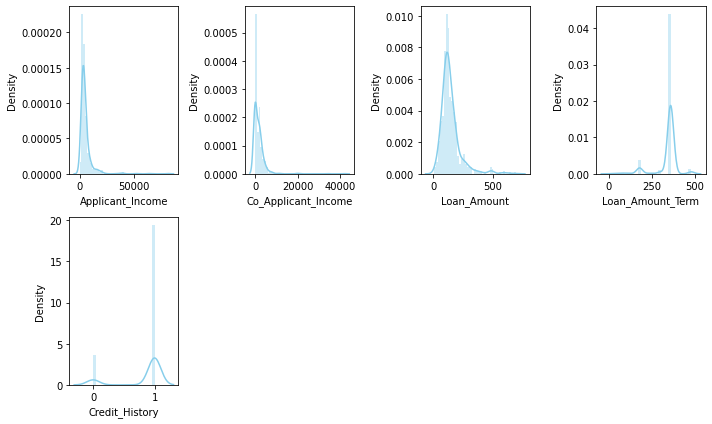

In [ ]:
features = Number
plt.figure(figsize = (10,6))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.distplot(x=df[features[i]], color = 'skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
df_new = df.copy()

In [ ]:
df_new['Gender'] = df_new['Gender'].replace('Male', 0).replace('Female', 1)
df_new['Married'] = df_new['Married'].replace('No', 0).replace('Yes', 1)
df_new['Education'] = df_new['Education'].replace('Not Graduate', 0).replace('Graduate', 1)
df_new['Self_Employed'] = df_new['Self_Employed'].replace('No', 0).replace('Yes', 1)
df_new['Loan_Status'] = df_new['Loan_Status'].replace('N', 0).replace('Y', 1)
df_new['Dependents'] = df_new['Dependents'].replace('0', 0).replace('1', 1).replace('2', 2).replace('3+', 3)

In [ ]:
df_new['Loan_Status'] = df['Loan_Status'].replace('Rejected', 0).replace('Accepted', 1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               601 non-null    float64
 2   Married              611 non-null    float64
 3   Dependents           599 non-null    float64
 4   Education            614 non-null    int64  
 5   Self_Employed        582 non-null    float64
 6   Applicant_Income     614 non-null    int64  
 7   Co_Applicant_Income  614 non-null    float64
 8   Income_Gabungan      614 non-null    float64
 9   Loan_Amount          592 non-null    float64
 10  Loan_Amount_Term     600 non-null    float64
 11  Credit_History       564 non-null    float64
 12  Residential_Area     614 non-null    object 
 13  Loan_Status          614 non-null    int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 67.3+ KB


## Missing Values Handling

In [ ]:
df_new.isna().sum()/len(df_new) * 100

Loan_ID                0.000000
Gender                 2.117264
Married                0.488599
Dependents             2.442997
Education              0.000000
Self_Employed          5.211726
Applicant_Income       0.000000
Co_Applicant_Income    0.000000
Income_Gabungan        0.000000
Loan_Amount            3.583062
Loan_Amount_Term       2.280130
Credit_History         8.143322
Residential_Area       0.000000
Loan_Status            0.000000
dtype: float64

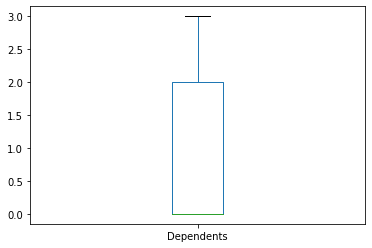

In [ ]:
## outlier check
df_new.boxplot(column = ['Dependents'], grid = False)

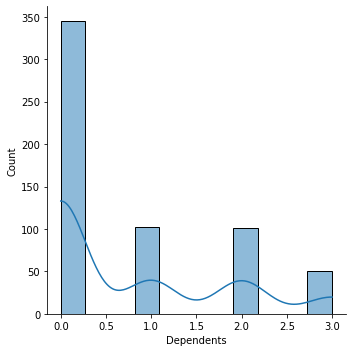

In [ ]:
sns.displot(df_new['Dependents'], kind = 'hist', kde=True)

In [ ]:
## even no outlier, the data is skew so we fill missing values with median
df_new['Dependents'] = df_new['Dependents'].fillna(df_new['Dependents'].median())

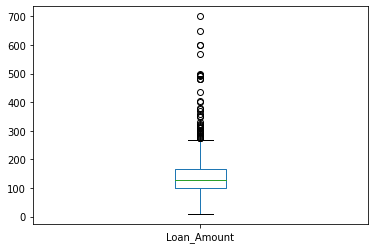

In [ ]:
## outlier check
df_new.boxplot(column = ['Loan_Amount'], grid = False)

In [ ]:
# karena ada outlier kita isi dengan median untuk missing valuesnya
df_new['Loan_Amount'] = df_new['Loan_Amount'].fillna(df_new['Loan_Amount'].median())

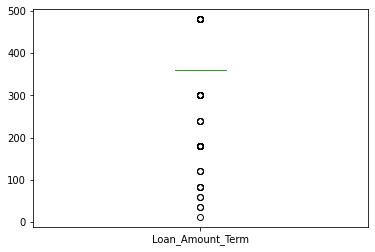

In [ ]:
## outlier check
df_new.boxplot(column = ['Loan_Amount_Term'], grid = False)

In [ ]:
# karena ada outlier kita isi dengan median untuk missing valuesnya

## even no outlier, the data is skew so we fill missing values with median
df_new['Loan_Amount_Term'] = df_new['Loan_Amount_Term'].fillna(df_new['Loan_Amount_Term'].median())

In [ ]:
df_new.isna().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents              0
Education               0
Self_Employed          32
Applicant_Income        0
Co_Applicant_Income     0
Income_Gabungan         0
Loan_Amount             0
Loan_Amount_Term        0
Credit_History         50
Residential_Area        0
Loan_Status             0
dtype: int64

In [ ]:
# kita isi dengan mode untuk missing valuesnya karena datanya hanya 2, Yes / No

## even no outlier, the data is skew so we fill missing values with median
df_new['Gender'] = df_new['Gender'].fillna(df_new['Gender'].mode()[0])
df_new['Married'] = df_new['Married'].fillna(df_new['Married'].mode()[0])
df_new['Self_Employed'] = df_new['Self_Employed'].fillna(df_new['Self_Employed'].mode()[0])
df_new['Credit_History'] = df_new['Credit_History'].fillna(df_new['Credit_History'].mode()[0])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    float64
 2   Married              614 non-null    float64
 3   Dependents           614 non-null    float64
 4   Education            614 non-null    int64  
 5   Self_Employed        614 non-null    float64
 6   Applicant_Income     614 non-null    int64  
 7   Co_Applicant_Income  614 non-null    float64
 8   Income_Gabungan      614 non-null    float64
 9   Loan_Amount          614 non-null    float64
 10  Loan_Amount_Term     614 non-null    float64
 11  Credit_History       614 non-null    float64
 12  Residential_Area     614 non-null    object 
 13  Loan_Status          614 non-null    int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 67.3+ KB


In [ ]:
df_new.duplicated().sum()

0

## Outlier Handling

In [ ]:
Num_1 = ['Gender','Married','Dependents','Education','Self_Employed']

In [ ]:
Num_2 = ['Self_Employed','Applicant_Income','Co_Applicant_Income','Loan_Amount','Loan_Amount_Term','Income_Gabungan']

In [ ]:
Num_3 = ['Credit_History','Loan_Status']

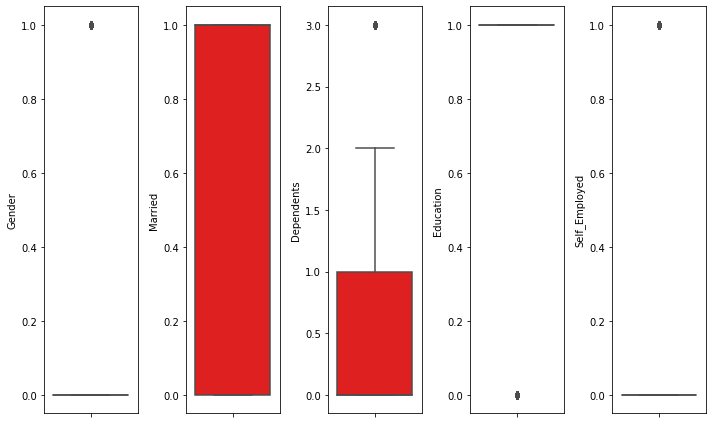

In [ ]:
features = Num_1
plt.figure(figsize=(10,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_new[features[i]], color = 'red')
    plt.tight_layout()

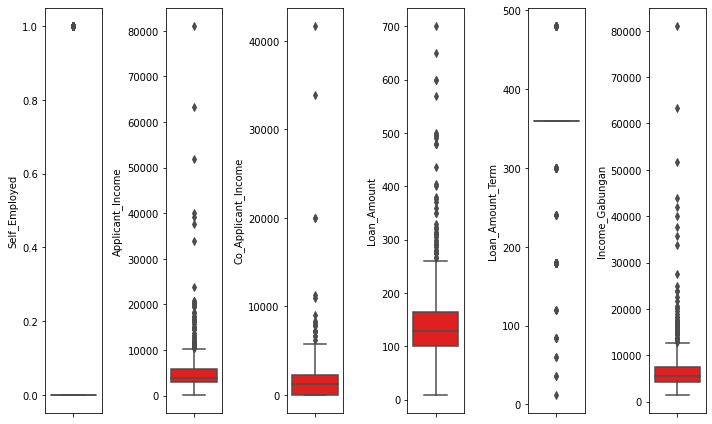

In [ ]:
features = Num_2
plt.figure(figsize=(10,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_new[features[i]], color = 'red')
    plt.tight_layout()

In [ ]:
# ada banyak outlier extreme di Num_2 yang harus di handle

In [ ]:
##Applicant Income

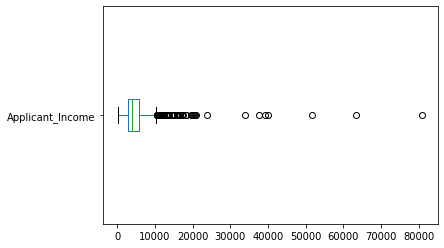

In [ ]:
## outlier check
df_new.boxplot(column = ['Applicant_Income'], vert = False, grid = False)

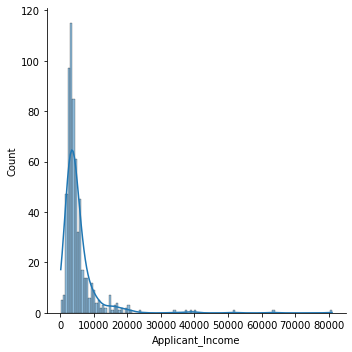

In [ ]:
sns.displot(df_new['Applicant_Income'], kind='hist', kde = True)

In [ ]:
df_new[df_new['Applicant_Income'] > 10200]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
9,LP001020,0.0,1.0,1.0,1,0.0,12841,10968.0,23809.0,349.0,360.0,1.0,Semiurban,0
34,LP001100,0.0,0.0,3.0,1,0.0,12500,3000.0,15500.0,320.0,360.0,1.0,Rural,0
54,LP001186,1.0,1.0,1.0,1,1.0,11500,0.0,11500.0,286.0,360.0,0.0,Urban,0
67,LP001233,0.0,1.0,1.0,1,0.0,10750,0.0,10750.0,312.0,360.0,1.0,Urban,1
102,LP001350,0.0,1.0,0.0,1,0.0,13650,0.0,13650.0,128.0,360.0,1.0,Urban,1
106,LP001369,0.0,1.0,2.0,1,0.0,11417,1126.0,12543.0,225.0,360.0,1.0,Urban,1
115,LP001401,0.0,1.0,1.0,1,0.0,14583,0.0,14583.0,185.0,180.0,1.0,Rural,1
119,LP001422,1.0,0.0,0.0,1,0.0,10408,0.0,10408.0,259.0,360.0,1.0,Urban,1
126,LP001448,0.0,1.0,3.0,1,0.0,23803,0.0,23803.0,370.0,360.0,1.0,Rural,1
128,LP001451,0.0,1.0,1.0,1,1.0,10513,3850.0,14363.0,160.0,180.0,0.0,Urban,0


In [ ]:
df_new[df_new['Applicant_Income'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
126,LP001448,0.0,1.0,3.0,1,0.0,23803,0.0,23803.0,370.0,360.0,1.0,Rural,1
130,LP001469,0.0,0.0,0.0,1,1.0,20166,0.0,20166.0,650.0,480.0,1.0,Urban,1
155,LP001536,0.0,1.0,3.0,1,0.0,39999,0.0,39999.0,600.0,180.0,0.0,Semiurban,1
171,LP001585,0.0,1.0,3.0,1,0.0,51763,0.0,51763.0,700.0,300.0,1.0,Urban,1
183,LP001637,0.0,1.0,1.0,1,0.0,33846,0.0,33846.0,260.0,360.0,1.0,Semiurban,0
185,LP001640,0.0,1.0,0.0,1,1.0,39147,4750.0,43897.0,120.0,360.0,1.0,Semiurban,1
284,LP001922,0.0,1.0,0.0,1,0.0,20667,0.0,20667.0,128.0,360.0,1.0,Rural,0
308,LP001996,0.0,0.0,0.0,1,0.0,20233,0.0,20233.0,480.0,360.0,1.0,Rural,0
333,LP002101,0.0,1.0,0.0,1,0.0,63337,0.0,63337.0,490.0,180.0,1.0,Urban,1
409,LP002317,0.0,1.0,3.0,1,0.0,81000,0.0,81000.0,360.0,360.0,0.0,Rural,0


In [ ]:
df_new['Applicant_Income'].clip(upper=20000, inplace= True)

In [ ]:
# Co_Applicant_Income

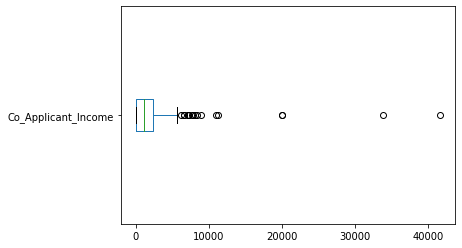

In [ ]:
## outlier check
df_new.boxplot(column = ['Co_Applicant_Income'], vert = False, grid = False)

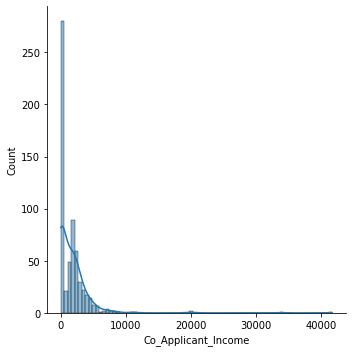

In [ ]:
sns.displot(df_new['Co_Applicant_Income'], kind='hist', kde = True)

In [ ]:
df_new[df_new['Co_Applicant_Income'] > 5800]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
9,LP001020,0.0,1.0,1.0,1,0.0,12841,10968.0,23809.0,349.0,360.0,1.0,Semiurban,0
12,LP001028,0.0,1.0,2.0,1,0.0,3073,8106.0,11179.0,200.0,360.0,1.0,Urban,1
38,LP001114,0.0,0.0,0.0,1,0.0,4166,7210.0,11376.0,184.0,360.0,1.0,Urban,1
122,LP001431,1.0,0.0,0.0,1,0.0,2137,8980.0,11117.0,137.0,360.0,0.0,Semiurban,1
135,LP001488,0.0,1.0,3.0,1,0.0,4000,7750.0,11750.0,290.0,360.0,1.0,Semiurban,0
177,LP001610,0.0,1.0,3.0,1,0.0,5516,11300.0,16816.0,495.0,360.0,0.0,Semiurban,0
180,LP001633,0.0,1.0,1.0,1,0.0,6400,7250.0,13650.0,180.0,360.0,0.0,Urban,0
253,LP001843,0.0,1.0,1.0,0,0.0,2661,7101.0,9762.0,279.0,180.0,1.0,Semiurban,1
349,LP002138,0.0,1.0,0.0,1,0.0,2625,6250.0,8875.0,187.0,360.0,1.0,Rural,1
372,LP002201,0.0,1.0,2.0,1,1.0,9323,7873.0,17196.0,380.0,300.0,1.0,Rural,1


In [ ]:
df_new[df_new['Co_Applicant_Income'] > 10000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
9,LP001020,0.0,1.0,1.0,1,0.0,12841,10968.0,23809.0,349.0,360.0,1.0,Semiurban,0
177,LP001610,0.0,1.0,3.0,1,0.0,5516,11300.0,16816.0,495.0,360.0,0.0,Semiurban,0
402,LP002297,0.0,0.0,0.0,1,0.0,2500,20000.0,22500.0,103.0,360.0,1.0,Semiurban,1
417,LP002342,0.0,1.0,2.0,1,1.0,1600,20000.0,21600.0,239.0,360.0,1.0,Urban,0
581,LP002893,0.0,0.0,0.0,1,0.0,1836,33837.0,35673.0,90.0,360.0,1.0,Urban,0
600,LP002949,1.0,0.0,3.0,1,0.0,416,41667.0,42083.0,350.0,180.0,1.0,Urban,0


In [ ]:
df_new['Co_Applicant_Income'].clip(upper=10000, inplace= True)

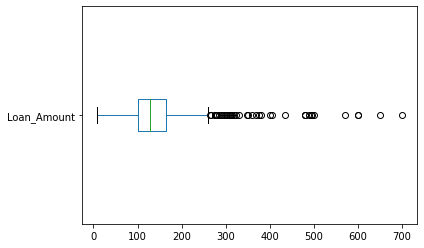

In [ ]:
## outlier check
df_new.boxplot(column = ['Loan_Amount'], vert = False, grid = False)

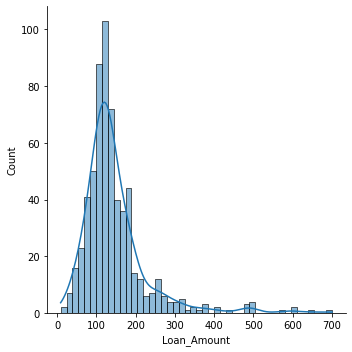

In [ ]:
sns.displot(df_new['Loan_Amount'], kind='hist', kde = True)

In [ ]:
df_new[df_new['Loan_Amount'] > 262]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
5,LP001011,0.0,1.0,2.0,1,1.0,5417,4196.0,9613.0,267.0,360.0,1.0,Urban,1
9,LP001020,0.0,1.0,1.0,1,0.0,12841,10000.0,23809.0,349.0,360.0,1.0,Semiurban,0
21,LP001046,0.0,1.0,1.0,1,0.0,5955,5625.0,11580.0,315.0,360.0,1.0,Urban,1
34,LP001100,0.0,0.0,3.0,1,0.0,12500,3000.0,15500.0,320.0,360.0,1.0,Rural,0
54,LP001186,1.0,1.0,1.0,1,1.0,11500,0.0,11500.0,286.0,360.0,0.0,Urban,0
67,LP001233,0.0,1.0,1.0,1,0.0,10750,0.0,10750.0,312.0,360.0,1.0,Urban,1
83,LP001273,0.0,1.0,0.0,1,0.0,6000,2250.0,8250.0,265.0,360.0,1.0,Semiurban,0
126,LP001448,0.0,1.0,3.0,1,0.0,20000,0.0,23803.0,370.0,360.0,1.0,Rural,1
130,LP001469,0.0,0.0,0.0,1,1.0,20000,0.0,20166.0,650.0,480.0,1.0,Urban,1
135,LP001488,0.0,1.0,3.0,1,0.0,4000,7750.0,11750.0,290.0,360.0,1.0,Semiurban,0


In [ ]:
df_new[df_new['Loan_Amount'] > 400]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
130,LP001469,0.0,0.0,0.0,1,1.0,20000,0.0,20166.0,650.0,480.0,1.0,Urban,1
155,LP001536,0.0,1.0,3.0,1,0.0,20000,0.0,39999.0,600.0,180.0,0.0,Semiurban,1
171,LP001585,0.0,1.0,3.0,1,0.0,20000,0.0,51763.0,700.0,300.0,1.0,Urban,1
177,LP001610,0.0,1.0,3.0,1,0.0,5516,10000.0,16816.0,495.0,360.0,0.0,Semiurban,0
278,LP001907,0.0,1.0,0.0,1,0.0,14583,0.0,14583.0,436.0,360.0,1.0,Semiurban,1
308,LP001996,0.0,0.0,0.0,1,0.0,20000,0.0,20233.0,480.0,360.0,1.0,Rural,0
333,LP002101,0.0,1.0,0.0,1,0.0,20000,0.0,63337.0,490.0,180.0,1.0,Urban,1
369,LP002191,0.0,1.0,0.0,1,0.0,19730,5266.0,24996.0,570.0,360.0,1.0,Rural,0
432,LP002386,0.0,0.0,0.0,1,0.0,12876,0.0,12876.0,405.0,360.0,1.0,Semiurban,1
487,LP002547,0.0,1.0,1.0,1,0.0,18333,0.0,18333.0,500.0,360.0,1.0,Urban,0


In [ ]:
df_new[df_new['Loan_Amount'] < 3.5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status


In [ ]:
df_new['Loan_Amount'].clip(upper=400, inplace= True)

In [ ]:
# Loan Amount Term

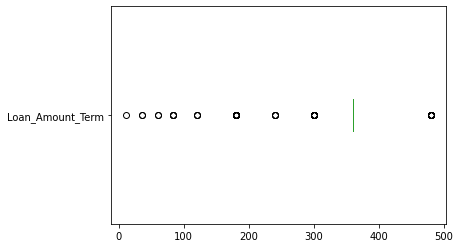

In [ ]:
## outlier check
df_new.boxplot(column = ['Loan_Amount_Term'], vert = False, grid = False)

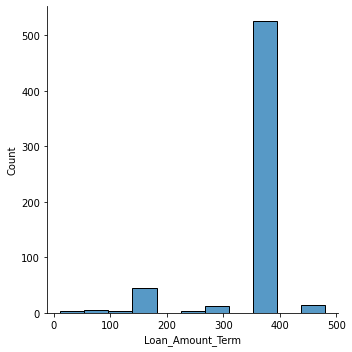

In [ ]:
sns.displot(df_new['Loan_Amount_Term'], kind='hist')

In [ ]:
Q1 = df_new['Loan_Amount_Term'].quantile(0.25)
Q1

Q3 = df_new['Loan_Amount_Term'].quantile(0.75)
Q3

IQR = Q3 - Q1
IQR

lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)



In [ ]:

lower_lim

360.0

In [ ]:
upper_lim

360.0

In [ ]:
df_new[df_new['Loan_Amount_Term'] > 400]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
75,LP001255,0.0,0.0,0.0,1,0.0,3750,0.0,3750.0,113.0,480.0,1.0,Urban,0
109,LP001384,0.0,1.0,3.0,0,0.0,2071,754.0,2825.0,94.0,480.0,1.0,Semiurban,1
130,LP001469,0.0,0.0,0.0,1,1.0,20000,0.0,20166.0,400.0,480.0,1.0,Urban,1
168,LP001579,0.0,0.0,0.0,1,0.0,2237,0.0,2237.0,63.0,480.0,0.0,Semiurban,0
179,LP001630,0.0,0.0,0.0,0,0.0,2333,1451.0,3784.0,102.0,480.0,0.0,Urban,0
228,LP001760,0.0,1.0,0.0,1,0.0,4758,0.0,4758.0,158.0,480.0,1.0,Semiurban,1
248,LP001824,0.0,1.0,1.0,1,0.0,2882,1843.0,4725.0,123.0,480.0,1.0,Semiurban,1
293,LP001945,1.0,0.0,0.0,1,0.0,5417,0.0,5417.0,143.0,480.0,0.0,Urban,0
298,LP001955,1.0,0.0,0.0,1,0.0,5000,2541.0,7541.0,151.0,480.0,1.0,Rural,0
358,LP002158,0.0,1.0,0.0,0,0.0,3000,1666.0,4666.0,100.0,480.0,0.0,Urban,0


In [ ]:
df_new[df_new['Loan_Amount_Term'] < 180]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
14,LP001030,0.0,1.0,2.0,1,0.0,1299,1086.0,2385.0,17.0,120.0,1.0,Urban,1
68,LP001238,0.0,1.0,3.0,0,1.0,7100,0.0,7100.0,125.0,60.0,1.0,Urban,1
94,LP001325,0.0,0.0,0.0,0,0.0,3620,0.0,3620.0,25.0,120.0,1.0,Semiurban,1
133,LP001482,0.0,1.0,0.0,1,1.0,3459,0.0,3459.0,25.0,120.0,1.0,Semiurban,1
242,LP001806,0.0,0.0,0.0,1,0.0,2965,5701.0,8666.0,155.0,60.0,1.0,Urban,1
262,LP001870,1.0,0.0,1.0,1,0.0,3481,0.0,3481.0,155.0,36.0,1.0,Semiurban,0
313,LP002008,0.0,1.0,2.0,1,1.0,5746,0.0,5746.0,144.0,84.0,1.0,Rural,1
495,LP002586,1.0,1.0,1.0,1,0.0,3326,913.0,4239.0,105.0,84.0,1.0,Semiurban,1
497,LP002588,0.0,1.0,0.0,1,0.0,4625,2857.0,7482.0,111.0,12.0,1.0,Urban,1
546,LP002768,0.0,0.0,0.0,0,0.0,3358,0.0,3358.0,80.0,36.0,1.0,Semiurban,0


In [ ]:
df_new['Loan_Amount_Term'].clip(upper=400, inplace= True)
df_new['Loan_Amount_Term'].clip(lower=180, inplace= True)

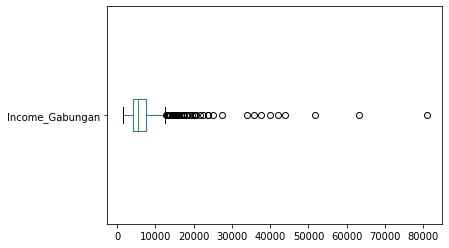

In [ ]:
## outlier check
df_new.boxplot(column = ['Income_Gabungan'], vert = False, grid = False)

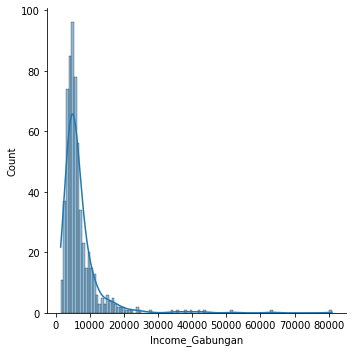

In [ ]:
sns.displot(df_new['Income_Gabungan'], kind='hist', kde = True)

In [ ]:
Q1 = df_new['Income_Gabungan'].quantile(0.25)
Q1

Q3 = df_new['Income_Gabungan'].quantile(0.75)
Q3

IQR = Q3 - Q1
IQR

lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)



In [ ]:
lower_lim

-867.625

In [ ]:
upper_lim

12555.375

In [ ]:
df_new[df_new['Income_Gabungan'] > 12555]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
9,LP001020,0.0,1.0,1.0,1,0.0,12841,10000.0,23809.0,349.0,360.0,1.0,Semiurban,0
34,LP001100,0.0,0.0,3.0,1,0.0,12500,3000.0,15500.0,320.0,360.0,1.0,Rural,0
102,LP001350,0.0,1.0,0.0,1,0.0,13650,0.0,13650.0,128.0,360.0,1.0,Urban,1
115,LP001401,0.0,1.0,1.0,1,0.0,14583,0.0,14583.0,185.0,180.0,1.0,Rural,1
126,LP001448,0.0,1.0,3.0,1,0.0,20000,0.0,23803.0,370.0,360.0,1.0,Rural,1
128,LP001451,0.0,1.0,1.0,1,1.0,10513,3850.0,14363.0,160.0,180.0,0.0,Urban,0
130,LP001469,0.0,0.0,0.0,1,1.0,20000,0.0,20166.0,400.0,400.0,1.0,Urban,1
138,LP001492,0.0,0.0,0.0,1,0.0,14999,0.0,14999.0,242.0,360.0,0.0,Semiurban,0
146,LP001516,1.0,1.0,2.0,1,0.0,14866,0.0,14866.0,70.0,360.0,1.0,Urban,1
155,LP001536,0.0,1.0,3.0,1,0.0,20000,0.0,39999.0,400.0,180.0,0.0,Semiurban,1


In [ ]:
df_new[df_new['Income_Gabungan'] > 30000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Income_Gabungan,Loan_Amount,Loan_Amount_Term,Credit_History,Residential_Area,Loan_Status
155,LP001536,0.0,1.0,3.0,1,0.0,20000,0.0,39999.0,400.0,180.0,0.0,Semiurban,1
171,LP001585,0.0,1.0,3.0,1,0.0,20000,0.0,51763.0,400.0,300.0,1.0,Urban,1
183,LP001637,0.0,1.0,1.0,1,0.0,20000,0.0,33846.0,260.0,360.0,1.0,Semiurban,0
185,LP001640,0.0,1.0,0.0,1,1.0,20000,4750.0,43897.0,120.0,360.0,1.0,Semiurban,1
333,LP002101,0.0,1.0,0.0,1,0.0,20000,0.0,63337.0,400.0,180.0,1.0,Urban,1
409,LP002317,0.0,1.0,3.0,1,0.0,20000,0.0,81000.0,360.0,360.0,0.0,Rural,0
443,LP002422,0.0,0.0,1.0,1,0.0,20000,0.0,37719.0,152.0,360.0,1.0,Semiurban,1
581,LP002893,0.0,0.0,0.0,1,0.0,1836,10000.0,35673.0,90.0,360.0,1.0,Urban,0
600,LP002949,1.0,0.0,3.0,1,0.0,416,10000.0,42083.0,350.0,180.0,1.0,Urban,0


In [ ]:
df_new['Income_Gabungan'].clip(upper=30000, inplace= True)

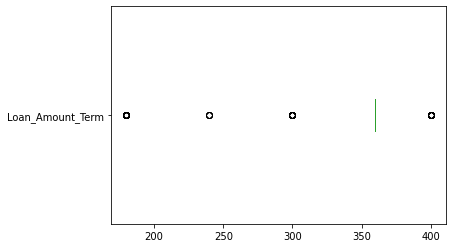

In [ ]:
## outlier check
df_new.boxplot(column = ['Loan_Amount_Term'], vert = False, grid = False)

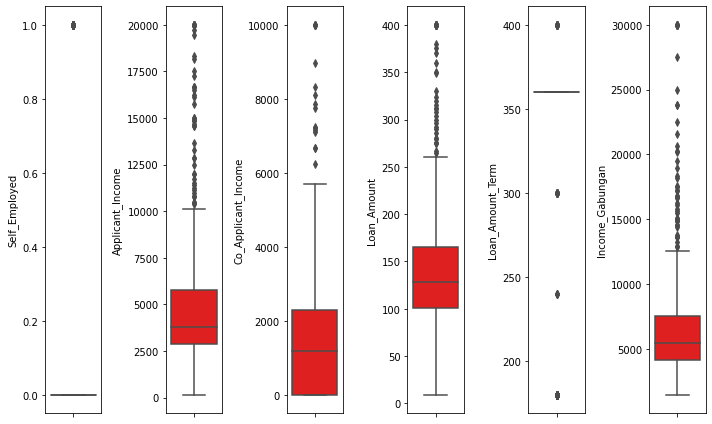

In [ ]:
# recheck outlier
features = Num_2
plt.figure(figsize=(10,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_new[features[i]], color = 'red')
    plt.tight_layout()

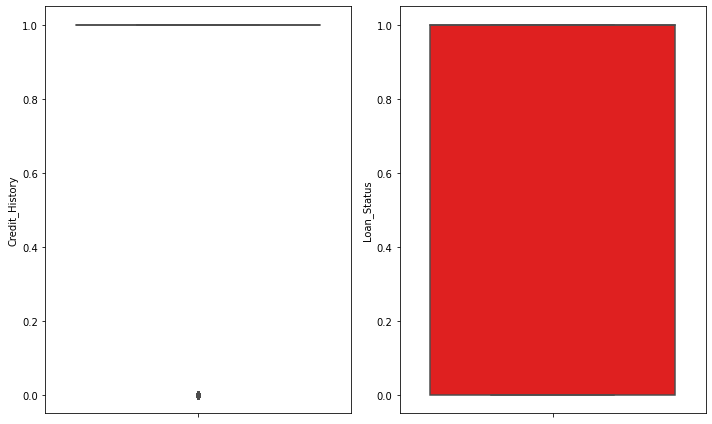

In [ ]:
features = Num_3
plt.figure(figsize=(10,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_new[features[i]], color = 'red')
    plt.tight_layout()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    float64
 2   Married              614 non-null    float64
 3   Dependents           614 non-null    float64
 4   Education            614 non-null    int64  
 5   Self_Employed        614 non-null    float64
 6   Applicant_Income     614 non-null    int64  
 7   Co_Applicant_Income  614 non-null    float64
 8   Income_Gabungan      614 non-null    float64
 9   Loan_Amount          614 non-null    float64
 10  Loan_Amount_Term     614 non-null    float64
 11  Credit_History       614 non-null    float64
 12  Residential_Area     614 non-null    object 
 13  Loan_Status          614 non-null    int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 67.3+ KB


In [ ]:
# drop kolom tidak penting
df_new = df_new.drop('Loan_ID', axis=1)

In [ ]:
df['Residential_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
# mengubah property area menjadi non object
df_new['Residential_Area'] = df_new['Residential_Area'].replace('Urban', 1).replace('Rural', 2).replace('Semiurban', 3)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    float64
 1   Married              614 non-null    float64
 2   Dependents           614 non-null    float64
 3   Education            614 non-null    int64  
 4   Self_Employed        614 non-null    float64
 5   Applicant_Income     614 non-null    int64  
 6   Co_Applicant_Income  614 non-null    float64
 7   Income_Gabungan      614 non-null    float64
 8   Loan_Amount          614 non-null    float64
 9   Loan_Amount_Term     614 non-null    float64
 10  Credit_History       614 non-null    float64
 11  Residential_Area     614 non-null    int64  
 12  Loan_Status          614 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 62.5 KB


In [ ]:
# ada fitur redundant
# kita recheck menggunakan heatmap

In [ ]:
## tidak ada feature redundant

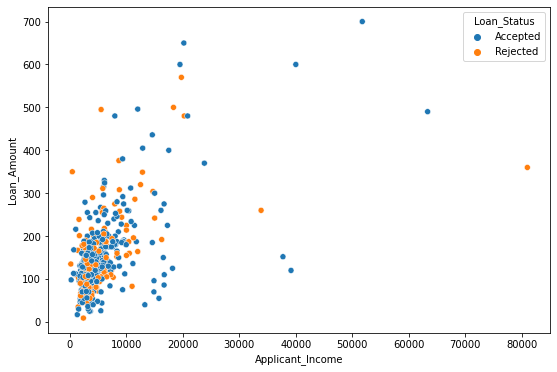

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(data=df, x='Applicant_Income', y='Loan_Amount', 
                hue='Loan_Status')

# Modeling

In [ ]:
# Modeling
from sklearn.model_selection import train_test_split

## Import Packages

In [ ]:
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df_new.drop(['Loan_Status'], axis = 1)
Y = df_new['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(491, 12) (123, 12) (491,) (123,)


In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df_new = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df_new.columns = ['feature','vif_score']
vif_df_new = vif_df_new.loc[vif_df_new.feature!='const']
vif_df_new

,feature,vif_score
1,Gender,1.170951
2,Married,1.301430
3,Dependents,1.213961
4,Education,1.079991
5,Self_Employed,1.082854
6,Applicant_Income,10.630602
7,Co_Applicant_Income,4.519444
8,Income_Gabungan,10.361818
9,Loan_Amount,2.183714
10,Loan_Amount_Term,1.075312


In [ ]:
# ada fitur redundant
# kita recheck menggunakan heatmap

In [ ]:
loan_train = pd.concat([X_train, y_train], axis=1)

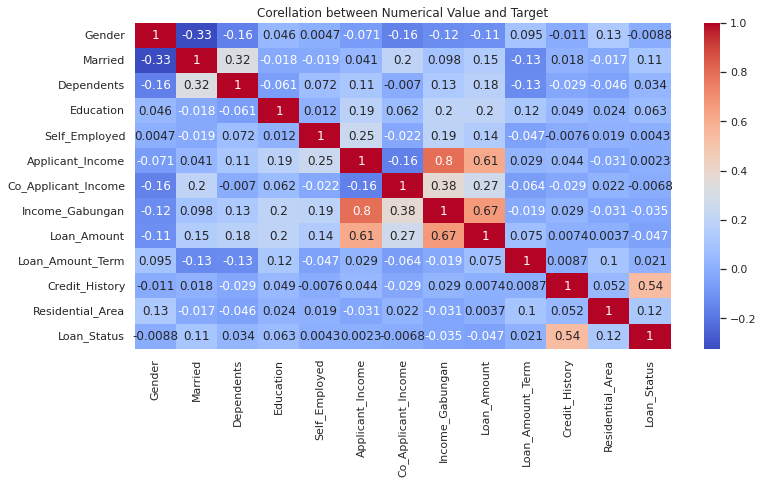

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
corr = loan_train.corr()
plt.title("Corellation between Numerical Value and Target")
sns.heatmap(corr,annot=True,cmap="coolwarm")


In [ ]:
X_train = X_train.drop(columns=["Applicant_Income"])
X_test = X_test.drop(columns=['Applicant_Income'])

In [ ]:
# drop kolom redundant
df_new = df_new.drop('Applicant_Income', axis=1)

In [ ]:
# recheck vif score
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df_new = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df_new.columns = ['feature','vif_score']
vif_df_new = vif_df_new.loc[vif_df_new.feature!='const']
vif_df_new

,feature,vif_score
1,Gender,1.164155
2,Married,1.274059
3,Dependents,1.181173
4,Education,1.079218
5,Self_Employed,1.057902
6,Co_Applicant_Income,1.250210
7,Income_Gabungan,2.044439
8,Loan_Amount,1.898219
9,Loan_Amount_Term,1.075312
10,Credit_History,1.010743


In [ ]:
loan_train = pd.concat([X_train, y_train], axis=1)

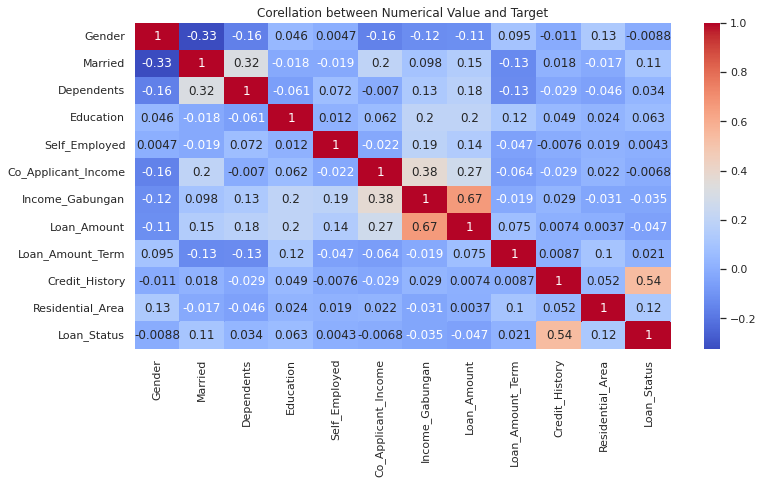

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
corr = loan_train.corr()
plt.title("Corellation between Numerical Value and Target")
sns.heatmap(corr,annot=True,cmap="coolwarm")


In [ ]:
# sudah bagus tidak ada fitur redundant lagi

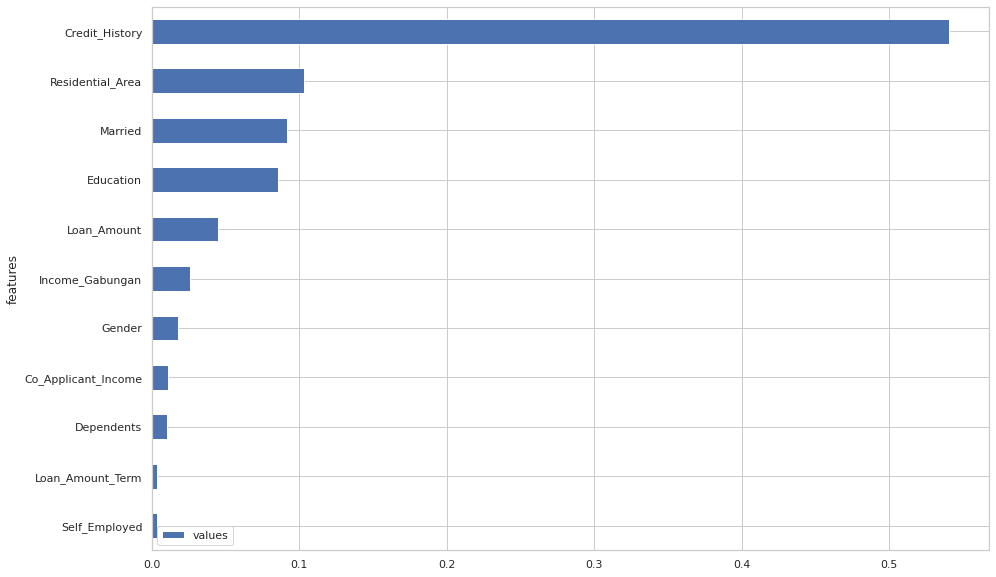

In [ ]:
df_new_corr = df_new.corr()
df_new_corr.Loan_Status.sort_values()[:-1]
results = {}
for k, v in df_new_corr.Loan_Status.sort_values()[:-1].items():
    
    results[k] =abs(v)
    
# Sort the dictionary by value in descending order
sorted_d = dict(sorted(results.items(), key=lambda item: item[1], reverse=False))
results  = pd.DataFrame({'features':sorted_d.keys(), 'values':sorted_d.values()})
results

# Plot the features importance 
results.plot(x = "features", y="values", kind="barh", figsize = (15,10))

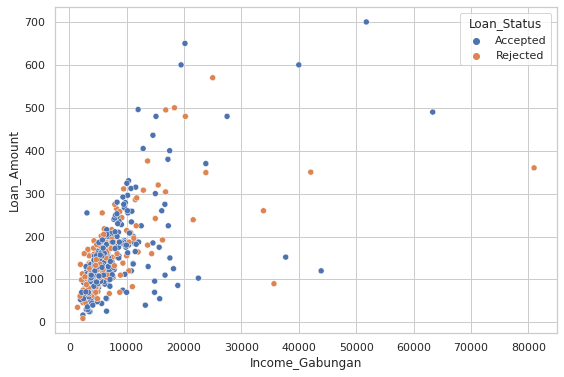

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(data=df, x='Income_Gabungan', y='Loan_Amount', 
                hue='Loan_Status')

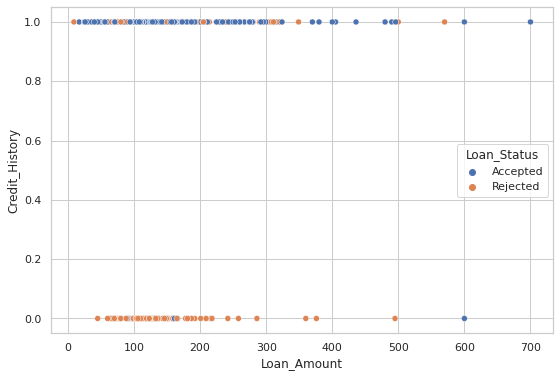

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(data=df, x='Loan_Amount', y='Credit_History', 
                hue='Loan_Status')

In [ ]:
# Modeling
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

import warnings
warnings.filterwarnings('ignore')

## Training Data

In [ ]:
X = df_new.drop(['Loan_Status'], axis = 1)
Y = df_new['Loan_Status']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(491, 11) (123, 11) (491,) (123,)


In [ ]:
cly = [LogisticRegression(),
      RandomForestClassifier(),
      XGBClassifier(random_state=42)]

da = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC'])
da

,Method,Recall,Precision,F1 Score,AUC


In [ ]:
for model in cly:
    model.fit(X_train, y_train)
    preds = model.predict(X_train)
    
    method = str(type(model)).split('.')[-1][:-2]
    

    auc = roc_auc_score(y_train, preds)
    f1 = f1_score(y_train, preds)
    precision = precision_score(y_train, preds)
    recall = recall_score(y_train, preds)
    
    
    da = da.append({'Method': method, 
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc},
                     ignore_index=True)

In [ ]:
da

,Method,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.982456,0.798100,0.880734,0.705993
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
2,XGBClassifier,0.982456,0.854962,0.914286,0.799953


## Testing Data

In [ ]:
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [ ]:
cly = [LogisticRegression(),
      RandomForestClassifier(),
      XGBClassifier(random_state=42)]

data = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC'])
data

,Method,Recall,Precision,F1 Score,AUC


In [ ]:
for model in cly:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
  
    method = str(type(model)).split('.')[-1][:-2]
    

    auc = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    
    
    data = data.append({'Method': method, 
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc},
                     ignore_index=True)

In [ ]:
data

,Method,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.9875,0.759615,0.858696,0.703052
1,RandomForestClassifier,0.9625,0.762376,0.850829,0.702180
2,XGBClassifier,0.9375,0.757576,0.837989,0.689680


In [ ]:
df_new['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
cm = confusion_matrix(y_test, preds)
cm

array([[19, 24],
       [ 5, 75]])

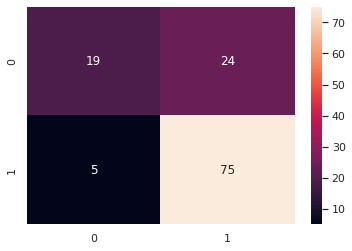

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

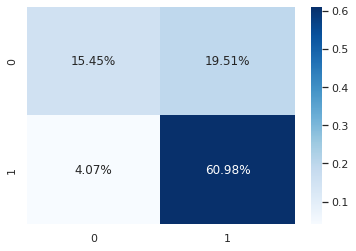

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

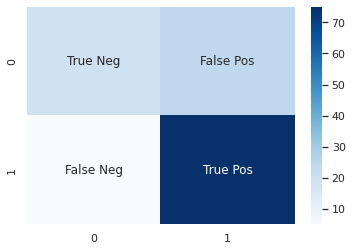

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

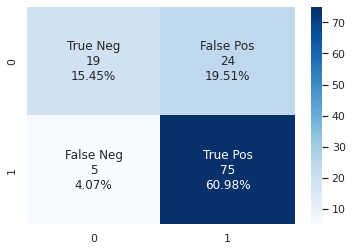

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
# repair outlier from Num_2 check if model has better value
df_repair = df_new.copy()

In [ ]:
df_repair['Co_Applicant_Income'].clip(upper=5800, inplace= True)

In [ ]:
df_repair['Loan_Amount'].clip(upper=270, inplace= True)

In [ ]:
df_repair['Loan_Amount_Term'].clip(upper=360, inplace= True)
df_repair['Loan_Amount_Term'].clip(lower=360, inplace= True)

In [ ]:
df_repair['Income_Gabungan'].clip(upper=12600, inplace= True)

In [ ]:
Num_4 = ['Self_Employed','Co_Applicant_Income','Loan_Amount','Loan_Amount_Term','Income_Gabungan']

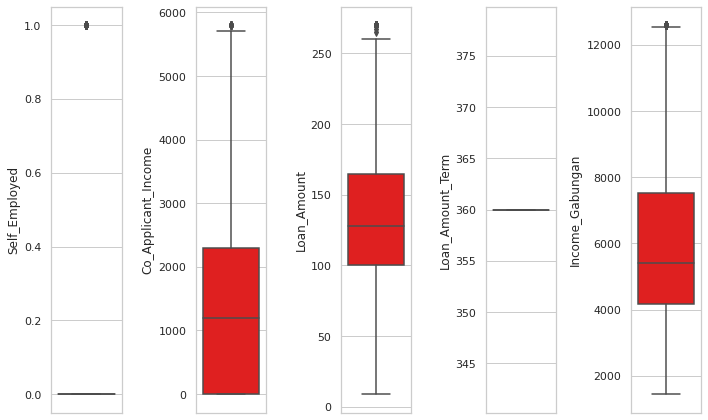

In [ ]:
# recheck outlier
features = Num_4
plt.figure(figsize=(10,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_repair[features[i]], color = 'red')
    plt.tight_layout()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
A = df_repair.drop(['Loan_Status'], axis = 1)
B = df_repair['Loan_Status']

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(A, B, test_size=0.20, random_state=42)
print(A_train.shape, A_test.shape, b_train.shape, b_test.shape)

(491, 11) (123, 11) (491,) (123,)


In [ ]:
cly = [LogisticRegression(),
      RandomForestClassifier(),
      XGBClassifier(random_state=42)]

dada = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC'])
dada

,Method,Recall,Precision,F1 Score,AUC


In [ ]:
for model in cly:
    model.fit(A_train, b_train)
    preds = model.predict(A_test)
    
    method = str(type(model)).split('.')[-1][:-2]
    

    auc = roc_auc_score(b_test, preds)
    f1 = f1_score(b_test, preds)
    precision = precision_score(b_test, preds)
    recall = recall_score(b_test, preds)
    
    
    dada = dada.append({'Method': method, 
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc},
                     ignore_index=True)

In [ ]:
dada

,Method,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.9875,0.759615,0.858696,0.703052
1,RandomForestClassifier,0.9625,0.754902,0.846154,0.690552
2,XGBClassifier,0.9500,0.767677,0.849162,0.707558


In [ ]:
conf = confusion_matrix(b_test, preds)
conf

array([[20, 23],
       [ 4, 76]])

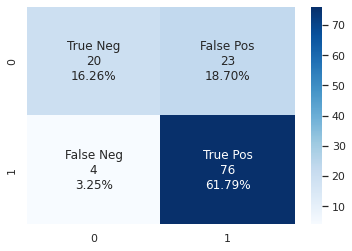

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues')

In [ ]:
# tidak ada peningkatan signifikan di semua metrics

In [ ]:
# Predict Proba

# Tuning Predict Proba

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
m = LogisticRegression(solver='lbfgs')

In [ ]:
X = df_repair.drop(['Loan_Status'], axis = 1)
y = df_repair['Loan_Status']

In [ ]:
# split train test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state = 21, stratify=y)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(307, 11) (307, 11) (307,) (307,)


In [ ]:
print(test_y.shape, y_pred.shape)

(307,) (307,)


Best Threshold=0.639203, F-Score=0.877


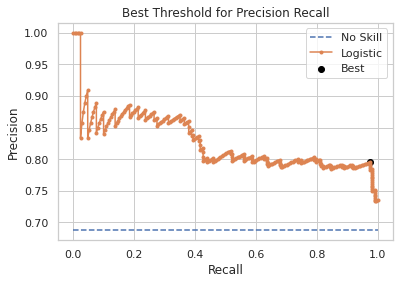

In [ ]:
from numpy import argmax
# split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)
# predict probabilities
y_pred = model.predict_proba(test_X)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(test_y, y_pred)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(test_y[test_y==1]) / len(test_y)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.title("Best Threshold for Precision Recall")
pyplot.show()

In [ ]:
threshold = 0.639203
y_pred = (model.predict_proba(test_X)[:, 1] > threshold).astype('float')
crystal = confusion_matrix(test_y, y_pred)

In [ ]:
crystal

array([[ 59,  37],
       [ 16, 195]])

Text(0.5, 1.0, 'Confusion Matrix for Precision and Recall')

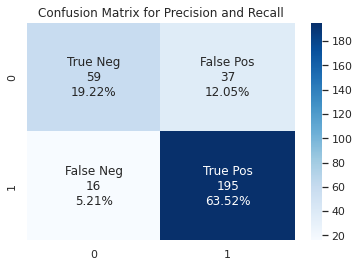

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                crystal.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     crystal.flatten()/np.sum(crystal)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(crystal, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix for Precision and Recall")

Best Threshold=0.974233, Precision=1.000


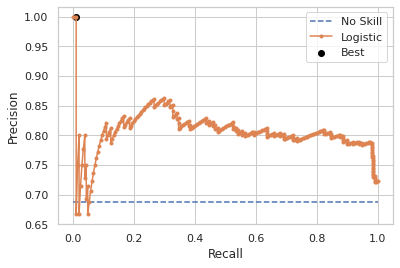

In [ ]:
from numpy import argmax
# split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)
# predict probabilities
y_pred = model.predict_proba(test_X)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(test_y, y_pred)
# locate the index of the largest precision
ix = argmax(precision)
print('Best Threshold=%f, Precision=%.3f' % (thresholds[ix], precision[ix]))
# plot the precision-recall curve for the model
no_skill = len(test_y[test_y==1]) / len(test_y)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
threshold = 0.90056
y_pred = (model.predict_proba(test_X)[:, 1] < threshold).astype('float')
cuy = confusion_matrix(test_y, y_pred)

In [ ]:
cuy

array([[  5,  91],
       [ 15, 196]])

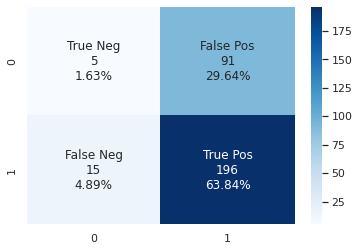

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cuy.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cuy.flatten()/np.sum(cuy)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cuy, annot=labels, fmt='', cmap='Blues')

In [ ]:
X = df_repair.drop(['Loan_Status'], axis = 1)
y = df_repair['Loan_Status']

In [ ]:
# split train test
trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.5, random_state = 21, stratify=y)
print(trainX.shape, testX.shape, trainy.shape, testy.shape)

(307, 11) (307, 11) (307,) (307,)


Best Threshold=0.639203


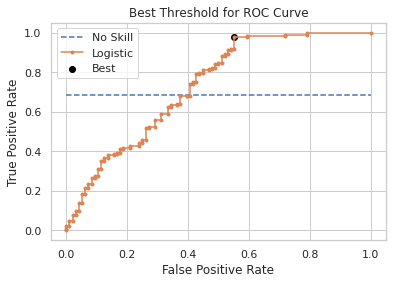

In [ ]:
# roc curve for logistic regression model with optimal threshold
from numpy import argmax
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
# generate dataset
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.title("Best Threshold for ROC Curve")
plt.show()

In [ ]:
threshold = 0.639203
yhat = (model.predict_proba(testX)[:, 1] > threshold).astype('float')
cacing = confusion_matrix(testy, yhat)

In [ ]:
cacing

array([[ 43,  53],
       [  6, 205]])

Text(0.5, 1.0, 'Confusion Matrix for ROC Curve')

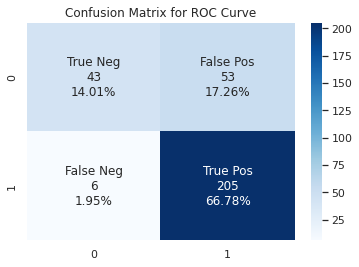

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cacing.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cacing.flatten()/np.sum(cacing)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cacing, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix for ROC Curve")